# K-Means Clustering Algorithm
[Source](https://github.com/aadhiseshannsut/Sem5-ML-lab/tree/main/K-Means%20Clustering)
***

# Importing necessary libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

# Generate Data

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)

# Model

In [3]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        """
        K-Means clustering algorithm.
        Parameters:
            n_clusters (int): Number of clusters.
            max_iter (int): Maximum number of iterations.
            tol (float): Tolerance for convergence.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        """
        Fit the K-Means model to the data.
        Parameters:
            X (ndarray): Data array of shape (n_samples, n_features).
        """
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Compute new centroids
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids

    def predict(self, X):
        """
        Predict the closest cluster for each sample in X.
        Parameters:
            X (ndarray): Data array of shape (n_samples, n_features).
        Returns:
            labels (ndarray): Array of cluster labels.
        """
        return self._assign_clusters(X)

    def _assign_clusters(self, X):
        """
        Assign clusters based on the closest centroid.
        Parameters:
            X (ndarray): Data array of shape (n_samples, n_features).
        Returns:
            labels (ndarray): Cluster assignments.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

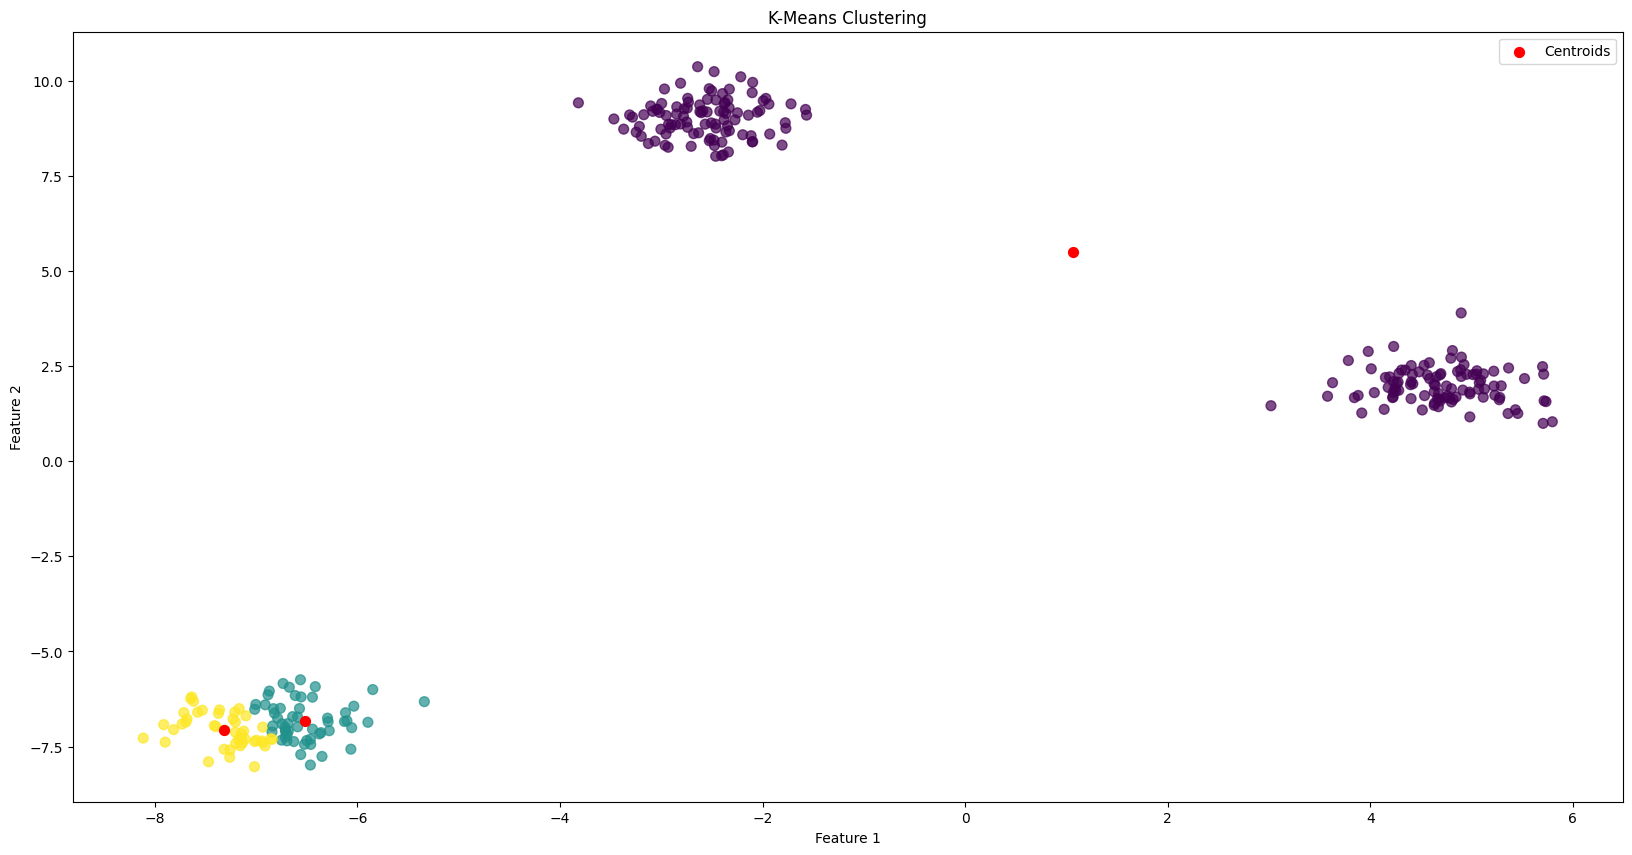

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='.', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**End**